<a href="https://colab.research.google.com/github/Alex-pu/Data-analysis-with-python/blob/More_on_windsor/WndsorElects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#defining in python
c= 3
d=7.9
e="Windsor City Election Results"
f= True
g= 2023-1-16

In [4]:
#changing date to date type(not automatic in python)
import datetime
g =datetime.datetime(2023,1,16)
type(e)


str

In [5]:
print(g)

2023-01-16 00:00:00


In [60]:
#important libraries used in this program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**importinf files to the nootebook(jupyter,colab)**

**Results. Who won the windsor**

In [7]:
dataframe= pd.read_csv('https://opendata.citywindsor.ca/Uploads/detailedresults-2018.csv', encoding='unicode_escape')


In [8]:
#name of the dataframe
type(dataframe)

pandas.core.frame.DataFrame

In [9]:
#size
dataframe.shape

(3057, 6)

In [10]:
#a rough vie of the data(remeber its 3057 rows), so the first ten rows.Python indexng strats at 0
dataframe.head(10)

,Ward,Poll,Poll Name,Contest Title,Candidate Name,Total
0,1,1,1-1 Harvest Bible Chapel (formerly Southwood C...,MAYOR,Drew DILKENS,312
1,1,1,1-1 Harvest Bible Chapel (formerly Southwood C...,MAYOR,Ernie LAMONT,9
2,1,1,1-1 Harvest Bible Chapel (formerly Southwood C...,MAYOR,Franz (Frank) DYCK,10
3,1,1,1-1 Harvest Bible Chapel (formerly Southwood C...,MAYOR,Matt MARCHAND,159
4,1,1,1-1 Harvest Bible Chapel (formerly Southwood C...,MAYOR,Tom HENSEL,7
5,1,2,1-2 Capri Pizzeria Recreational Complex (forme...,MAYOR,Drew DILKENS,458
6,1,2,1-2 Capri Pizzeria Recreational Complex (forme...,MAYOR,Ernie LAMONT,8
7,1,2,1-2 Capri Pizzeria Recreational Complex (forme...,MAYOR,Franz (Frank) DYCK,9
8,1,2,1-2 Capri Pizzeria Recreational Complex (forme...,MAYOR,Matt MARCHAND,205
9,1,2,1-2 Capri Pizzeria Recreational Complex (forme...,MAYOR,Tom HENSEL,2


In [11]:
dataframe.dtypes

Ward              object
Poll              object
Poll Name         object
Contest Title     object
Candidate Name    object
Total              int64
dtype: object

In [12]:
#the positions being contsted for
dataframe['Contest Title'].value_counts()

MAYOR                                                                                                            565
TRUSTEE CONSEIL SCOLAIRE VIAMONDE CITY OF WINDSOR - WARDS 1-10 AND COUNTY OF ESSEX                               363
TRUSTEE ENGLISH PUBLIC 3,4,10                                                                                    329
TRUSTEE ENGLISH PUBLIC 5,6,7,8                                                                                   245
TRUSTEE ENGLISH PUBLIC 1,2,9                                                                                     222
COUNCILLOR WARD 10                                                                                               152
COUNCILLOR WARD 8                                                                                                144
COUNCILLOR WARD 5                                                                                                114
TRUSTEE ENGLISH SEPARATE 3,4                                    

In [13]:
#Picking out the rows that contain "Mayor" contestants
df=dataframe[dataframe['Contest Title']=='MAYOR']


In [14]:
df[256:275]

,Ward,Poll,Poll Name,Contest Title,Candidate Name,Total
256,5,3,5-3 Seminole Public Library,MAYOR,Ernie LAMONT,11
257,5,3,5-3 Seminole Public Library,MAYOR,Franz (Frank) DYCK,8
258,5,3,5-3 Seminole Public Library,MAYOR,Matt MARCHAND,171
259,5,3,5-3 Seminole Public Library,MAYOR,Tom HENSEL,9
260,5,4,5-4 Most Precious Blood Parish,MAYOR,Drew DILKENS,322
261,5,4,5-4 Most Precious Blood Parish,MAYOR,Ernie LAMONT,24
262,5,4,5-4 Most Precious Blood Parish,MAYOR,Franz (Frank) DYCK,4
263,5,4,5-4 Most Precious Blood Parish,MAYOR,Matt MARCHAND,227
264,5,4,5-4 Most Precious Blood Parish,MAYOR,Tom HENSEL,0
265,5,5,5-5 Constable John Atkinson Memorial Community...,MAYOR,Drew DILKENS,471


In [15]:
df.shape

(565, 6)

In [16]:
#list of Mayor contetsants
pd.unique(df['Candidate Name'])

array(['Drew DILKENS', 'Ernie LAMONT', 'Franz (Frank) DYCK',
       'Matt MARCHAND', 'Tom HENSEL'], dtype=object)

In [17]:
#Grouping the candidates together with the votes they got!
total_votes= df.groupby(['Candidate Name'])['Total'].sum().sort_values(ascending= False)
print(total_votes)

Candidate Name
Drew DILKENS          31201
Matt MARCHAND         18626
Ernie LAMONT           1121
Tom HENSEL              797
Franz (Frank) DYCK      785
Name: Total, dtype: int64


Text(0.5, 1.0, 'Windsor City Election Results')

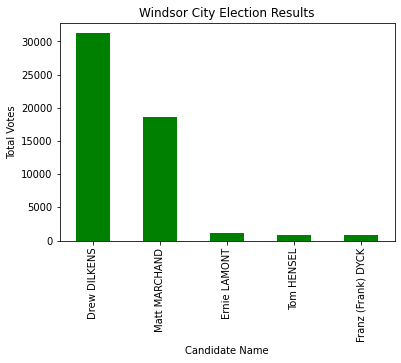

In [18]:
total_votes.plot.bar(color='g')
plt.ylabel('Total Votes')
plt.title(e)

In [20]:
df[20:30]

,Ward,Poll,Poll Name,Contest Title,Candidate Name,Total
20,1,5,1-5 Roseland Golf and Curling Club,MAYOR,Drew DILKENS,621
21,1,5,1-5 Roseland Golf and Curling Club,MAYOR,Ernie LAMONT,13
22,1,5,1-5 Roseland Golf and Curling Club,MAYOR,Franz (Frank) DYCK,8
23,1,5,1-5 Roseland Golf and Curling Club,MAYOR,Matt MARCHAND,254
24,1,5,1-5 Roseland Golf and Curling Club,MAYOR,Tom HENSEL,2
25,1,6,1-6 Academie Ste. Cecile International School,MAYOR,Drew DILKENS,459
26,1,6,1-6 Academie Ste. Cecile International School,MAYOR,Ernie LAMONT,8
27,1,6,1-6 Academie Ste. Cecile International School,MAYOR,Franz (Frank) DYCK,7
28,1,6,1-6 Academie Ste. Cecile International School,MAYOR,Matt MARCHAND,213
29,1,6,1-6 Academie Ste. Cecile International School,MAYOR,Tom HENSEL,1


In [24]:
seats= pd.unique(dataframe['Contest Title'])
print(seats)

['MAYOR' 'COUNCILLOR WARD 1' 'COUNCILLOR WARD 2' 'COUNCILLOR WARD 3'
 'COUNCILLOR WARD 4' 'COUNCILLOR WARD 5' 'COUNCILLOR WARD 6'
 'COUNCILLOR WARD 7' 'COUNCILLOR WARD 8' 'COUNCILLOR WARD 9'
 'COUNCILLOR WARD 10' 'TRUSTEE ENGLISH PUBLIC 1,2,9'
 'TRUSTEE ENGLISH PUBLIC 3,4,10' 'TRUSTEE ENGLISH PUBLIC 5,6,7,8'
 'TRUSTEE ENGLISH SEPARATE 1, 10' 'TRUSTEE ENGLISH SEPARATE 2,9'
 'TRUSTEE ENGLISH SEPARATE 3,4' 'TRUSTEE ENGLISH SEPARATE 5,8'
 'TRUSTEE ENGLISH SEPARATE 6,7'
 'TRUSTEE CONSEIL SCOLAIRE VIAMONDE CITY OF WINDSOR - WARDS 1-10 AND COUNTY OF ESSEX'
 'TRUSTEE CONSEIL SCOLAIRE CATHOLIQUE PROVINDENCE CITY OF WINDSOR WARDS 6, 7 AND TOWN OF TECUMSEH WARDS 1, 2, 3']


****councillor ward 5 contest****

In [29]:
#overview
ward5= dataframe[dataframe['Contest Title']=='COUNCILLOR WARD 5']
ward5.head()

,Ward,Poll,Poll Name,Contest Title,Candidate Name,Total
832,5,1,5-1 Gino and Liz Marcus Community Complex,COUNCILLOR WARD 5,Adam CASTLE,37
833,5,1,5-1 Gino and Liz Marcus Community Complex,COUNCILLOR WARD 5,Ed SLEIMAN,107
834,5,1,5-1 Gino and Liz Marcus Community Complex,COUNCILLOR WARD 5,Joe LUCIER,8
835,5,1,5-1 Gino and Liz Marcus Community Complex,COUNCILLOR WARD 5,Joey WRIGHT,84
836,5,1,5-1 Gino and Liz Marcus Community Complex,COUNCILLOR WARD 5,Lillian B. KRUZSELY,10


*polling stations*


In [35]:
polst=pd.unique(ward5['Poll Name'])
print(polst)

['5-1 Gino and Liz Marcus Community Complex' '5-2 Lions Manor'
 '5-3 Seminole Public Library' '5-4 Most Precious Blood Parish'
 '5-5 Constable John Atkinson Memorial Community Centre'
 '5-6 St. Jerome Parish' '5-7 Parkwood Gospel Temple'
 '5-8 Lifetimes on Riverside' '5-9 The Shoreview at Riverside'
 'ADVANCE POLL DAY 1 - 1' 'ADVANCE POLL DAY 1 - 2'
 'ADVANCE POLL DAY 2 - 1' 'ADVANCE POLL DAY 2 - 2'
 'ADVANCE POLL DAY 3 - 1' 'ADVANCE POLL DAY 3 - 2'
 'ADVANCE POLL DAY 4 - 1' 'ADVANCE POLL DAY 4 - 2'
 'ADVANCE POLL DAY 5 - 1' 'ADVANCE POLL DAY 5 - 2']


***VOTE COUNT***

In [43]:
votecount= ward5.groupby(['Candidate Name'])['Total'].sum().sort_values(ascending=False)
print(votecount)


Candidate Name
Ed SLEIMAN             2294
Joey WRIGHT            1341
Adam CASTLE             391
Lillian B. KRUZSELY     165
Joe LUCIER              108
Martin A. UTROSA         52
Name: Total, dtype: int64


In [44]:
votecount.max()

2294

**votes plot**

In [83]:
labels=["ED","Joey","Adam","lillian","Joe","Martin"]
y=np.array([2294,1341,391,165,108,52])

In [91]:
explode=(0.2, 0,0,0,0,0)



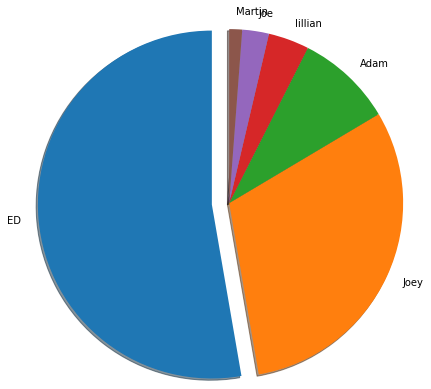

In [95]:
plt.pie(y,labels=labels,explode=explode,radius=2,startangle=90,shadow=True)
plt.show()



TypeError: ignored